# Homework 1 - data validation & cleaning (deadline 31. 10. 2020)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in details: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can!

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  2. Check consistency (i.e. that same things are represented in the same way) of at least three features where you expect problems (include "Object Name" feature). You can propose how to clean selected features, however do not apply cleaning (in your interest) :)
  3. Select some features where you expect integrity problems (describe your choice) and check integrity of those features. By integrity we mean correct logical relations between features (e.g. female names for females only).
  4. Convert at least five features to a proper data type. Choose at least one numeric, one categorical and one datetime.
  5. Find some outliers (describe your method).
  6. Detect missing data in at least three features, convert them to a proper representation (if they are already not), and impute missing values in at least one feature.

**If you do all this properly, you will obtain 16 points.** However, all your steps and following code **have to be commented!**

To earn **two points** for extra activity you can do some of these:
  * Focus more precisely on cleaning of the "Medium" feature. Such if you like to use it in KNN based algorithms later.
  * Focus on the extraction of physical dimensions of each item (width, depth and height in centimeters) from the "Dimensions" feature.

## Comments

  * Please follow the instructions from https://courses.fit.cvut.cz/MI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, she can (!) give you another chance to rework your homework and to obtain more points. However, this is not a given, so do your best! :)

## Solution

## Sections

- Imports
- 1. Download dataset 
    - Copy the dataframe
    - Basic dataset information
    - Data example
- 2. Feature consistency check
    - Feature "Gallery Number"
    - Feature "AccessionYear"
    - Feature "Object Name"
    - Feature "Object Number"
- 3. Feature integrity problems
    - "Object Number" (number before first dot) == "AccessionYear"
    - "Object Begin Date" <= "Object End Date"
- 4. Feature type conversions
    - Numeric conversion
        - "Constiuent ID"
        - "Gallery Number"
    - Categorical conversion
        - "Constiuent ID"
        - "Object Number"
        - "Department"
    - Datetime conversion
        - "AccessionYear"
- 5. Outliers
    - Rule of thumb
    - "Object Begin Date" and "Object End Date"
- 6. Missing data detection and imputation 
    - Missing values Detection
    - Potential candidates for group imputation
    - Helper functions
    - Feature "Medium"
    - Feature "AccessionYear"
    - Feature "Classification"
    - Feature "Object Date"


## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

### 1. Download dataset 

In [2]:
# should be accessed only to make copy with pd.DataFrame.copy()
original_df = pd.read_csv('MetObjects.csv')

/home/langerjaros/.langerenv_0.2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,7,10,11,12,13,14,15,22,34,35,36,37,38,39,40,41,42,43,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Copy the dataframe

In [3]:
df = original_df.copy()

### Basic dataset information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474526 entries, 0 to 474525
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            474526 non-null  object 
 1   Is Highlight             474526 non-null  bool   
 2   Is Timeline Work         474526 non-null  bool   
 3   Is Public Domain         474526 non-null  bool   
 4   Object ID                474526 non-null  int64  
 5   Gallery Number           54386 non-null   object 
 6   Department               474526 non-null  object 
 7   AccessionYear            470560 non-null  object 
 8   Object Name              473172 non-null  object 
 9   Title                    444655 non-null  object 
 10  Culture                  206456 non-null  object 
 11  Period                   90362 non-null   object 
 12  Dynasty                  23144 non-null   object 
 13  Reign                    11180 non-null   object 
 14  Port

### Data example

In [5]:
pd.set_option("max_columns", None)
display(df.sample(n=3))
pd.reset_option("max_columns")

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
303002,31.19.5,False,False,True,448564,NaN,Islamic Art,1931,Fragment,Textile Fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10th century,900,999,"Linen, silk; plain weave, tapestry weave",Textile: L. 13 1/2 in. (34.3 cm)\r\n ...,"Gift of George D. Pratt, 1931",Attributed to,NaN,NaN,NaN,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,Textiles-Woven,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
196419,86.11.249a,False,False,True,321825,NaN,Ancient Near Eastern Art,1886,Cuneiform tablet,Cuneiform tablet: receipt of a kid,Neo-Sumerian,Ur III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 2051 B.C.,-2051,-2051,Clay,2.8 x 2.6 x 1.4 cm (1 1/8 x 1 x 1/2 in.),"Purchase, 1886",NaN,NaN,NaN,NaN,NaN,Mesopotamia,probably from Drehem (ancient Puzrish-Dagan),NaN,NaN,NaN,NaN,Clay-Tablets-Inscribed,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Cuneiform,http://vocab.getty.edu/page/aat/300028711,https://www.wikidata.org/wiki/Q401
376474,63.350.207.145.1.233,False,False,True,644236,NaN,Drawings and Prints,1963,Print,"Actress wearing military costume with sword, f...",NaN,NaN,NaN,NaN,NaN,10567,Publisher,Issued by,"W. Duke, Sons & Co.","New York and Durham, N.C.",NaN,"Duke, W. Sons & Co.",NaN,1870,1920,NaN,(not assigned),https://www.wikidata.org/wiki/Q66734555,1880s,1880,1889,Albumen photograph,Sheet: 2 1/2 × 1 3/8 in. (6.4 × 3.5 cm),"The Jefferson R. Burdick Collection, Gift of J...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Photographs|Ephemera,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Portraits|Women|Actresses,http://vocab.getty.edu/page/aat/300015637|http...,https://www.wikidata.org/wiki/Q134307|https://...


### 2. Feature consistency check

In [6]:
def explore_floats(df, feature):
    """Print basic information about values of type float"""
    float_filter = df[feature].apply(lambda x: isinstance(x, float))
    float_num = float_filter.sum()
    float_nan = df[float_filter][feature].isnull().sum()
    float_dec = df[float_filter][feature].notnull().sum()
    row_num = df.shape[0]
    print(f"Float values - number of floats: {float_num} (~ {float_num/row_num*100:.2f}% of rows)",
        f"nan values: {float_nan} (~ {float_nan/float_num*100:.2f}% of floats ~ {float_nan/row_num*100:.2f}% of rows)",
        f"Decimal numbers: {float_dec} (~ {float_dec/float_num*100:.2f}% of floats)\n", sep="\n"
    )
    return None

def explore_strings(df, feature):
    """Print basic information about values of type string"""
    string_filter = df[feature].apply(lambda x: isinstance(x, str))
    string_number = string_filter.sum()
    string_numeric = df[string_filter][feature].str.isnumeric().sum()
    string_oth = (~df[string_filter][feature].str.isnumeric()).sum()
    row_num = df.shape[0]
    print(f"String values - number of string values: {string_number} (~ {string_number/row_num*100:.2f}% of rows)",
            f"Numeric strings: {string_numeric} (~ {string_numeric/string_number*100:.2f}% of strings)",
            f"Other strings: {string_oth} (~ {string_oth/string_number*100:.2f}% of strings)\n", sep="\n"
    )
    print("Number of unique other strings: {}, the strings: {}\n".format(
        df[string_filter][(~df[string_filter][feature].str.isnumeric())][feature].nunique(),
        df[string_filter][(~df[string_filter][feature].str.isnumeric())][feature].unique()
    ))
    return None

def explore_other(df, feature, feature_type):
    """Print number of values of given type"""
    none_filter = df[feature].apply(lambda x: isinstance(x, feature_type))
    none_number = none_filter.sum()
    row_num = df.shape[0]
    print("{} values - number: {} (~ {:.2f}% of rows)\n".format(
        feature_type, none_number, none_number/row_num*100
    ))


def explore_feature(df, feature):
    """Print basic information about given feature such as its value types, and more"""
    print("Number of rows: {}\nNumber of unique values (nan included): {}\n".format(
        df.shape[0], df[feature].nunique(False)
    ))

    display("Sample of how the values look like:",
        df[feature].sample(n=10)
    )
    # print(f"Type of \"{feature}\" feature: {df.dtypes[feature]}\n")

    value_types = df[feature].apply(lambda x: type(x)).unique()
    print(f"Value types: {value_types}\n")

    for value_type in value_types:
        if (value_type is float):
            explore_floats(df, feature)
        elif (value_type is str):
            explore_strings(df, feature)
        else:
            explore_other(df, feature, value_type)
    return None

### Feature "Gallery Number"

#### Check findings

- Type of **"Gallery Number"** feature was understood as object.
- Altogether there are **590** unique values (591 with nan value).
- There are two types of values, **string** values and **float** values.
    - Float values are most of the rows (96.8%) out of which 90% are **not a number** values.
    - String values makes 3.2% of the rows, most of them are contains numeric characters only 99.9%
        - **15 (4 unique)** strings are not numeric, namely they are \[*'in Great Hall' 'Petrie Ct. Café' 'on Fifth Avenue' 'Façade'*\].

#### Conclusion

- The values are **not consistent**.

#### Proposed solution

- **Replace** the four "labeled" names with **numbers** and **convert** all values to **float** type (because of nans).
    - In case nan is a problem, replace it with some appropriete number (then the numbers can be integers also).

In [7]:
explore_feature(df, "Gallery Number")

Number of rows: 474526
Number of unique values (nan included): 591



'Sample of how the values look like:'

36236     NaN
197043    NaN
412751    NaN
250975    NaN
361019    122
448824    NaN
143099    NaN
267427    NaN
247028    NaN
278429    NaN
Name: Gallery Number, dtype: object

Value types: [<class 'float'> <class 'str'>]

Float values - number of floats: 459353 (~ 96.80% of rows)
nan values: 420140 (~ 91.46% of floats ~ 88.54% of rows)
Decimal numbers: 39213 (~ 8.54% of floats)

String values - number of string values: 15173 (~ 3.20% of rows)
Numeric strings: 15158 (~ 99.90% of strings)
Other strings: 15 (~ 0.10% of strings)

Number of unique other strings: 4, the strings: ['in Great Hall' 'Petrie Ct. Café' 'on Fifth Avenue' 'Façade']



### Feature "AccessionYear"

Disclaimer - very similar to previous feature "Gallery Number"

#### Check findings

- Type of **"AccessionYear"** feature was understood as object..
- There are **264** unique values (265 with not a number value)
- Values are either:  **floats, integers** or, **strings**.
    - Float values makes most of the rows (89.78%) out of which there are only 0.93% of nan values.
    - 16384 values (3.45%) are integers
    - There are 32127 strings (6.77%) where only 2 are can not be considered as numeric. namely \[*'2005-02-15' '2020-03-23'*\].

#### Conclusion

- The values are **not consistent**.

#### Proposed solution

- Convert all values to  **datetime** type.
    - In case datetime is not appropriete solution, then extract years from the two abnormalities and convert all values float (because of the nan values).

In [8]:
explore_feature(df, "AccessionYear")

Number of rows: 474526
Number of unique values (nan included): 265



'Sample of how the values look like:'

435281    1955
211054    1941
142653    1874
4541      1986
35301     1914
211721    1972
454538    1963
367557    1930
348523    1910
49721     1919
Name: AccessionYear, dtype: object

Value types: [<class 'float'> <class 'int'> <class 'str'>]

Float values - number of floats: 426015 (~ 89.78% of rows)
nan values: 3966 (~ 0.93% of floats ~ 0.84% of rows)
Decimal numbers: 422049 (~ 99.07% of floats)

<class 'int'> values - number: 16384 (~ 3.45% of rows)

String values - number of string values: 32127 (~ 6.77% of rows)
Numeric strings: 32125 (~ 99.99% of strings)
Other strings: 2 (~ 0.01% of strings)

Number of unique other strings: 2, the strings: ['2005-02-15' '2020-03-23']



### Feature "Object Name"

#### Check findings

- The type of feature **"Object Name"** was resolved as an object type. 
- Values are one of these **two** types:  **float** and **string**.
    - Most of the values (473172 ~ 99.71%) are type of string
    - Zero values are numerical (i.e. 0 string values are numeric adn and all float valeus are **not a number**)
    - About **30 percent** values are **not a number**.
- There are **28076** unique values (28077 with nan).
    - When the comparism is made case-insensitive, the number of unique values declines to **27253**.
    - When all the unicode-non-word characters are extracted, the nubmer of unique values lowers to **26158**.
- Example of inconsistency in naming of two identical items (at least I hope they should be the same names):
    - The difference is either in **spelling**, usage of **special characters**, **meta characters** (*italics*) or in **level of description**.
```
'Blade and mounting for a dagger (Tanōt)',
'Blade and mounting for a dagger (Tanto)', 'Dagger (Tantō)',
'Blade and mounting for a short sword (Wakizashi) \r\n',
'Blade and mounting for a short sword (<i>Wakizashi</i>)',
'Blade and mounting for a slung sword (Tachi)',
'Blade and mounting for a short sword (Wakazashi)',
'Blade and mounting for a short sword (wakizashi)',
'Blade and mounting for a short sword (Waskizashi)',
```

#### Conclusion

- The values are **not consistent**.

#### Proposed solution

- The approach would be chosed based on **choice** whether **it is better** to **not identify same names** (1), or **merge names which are different** indeed (2).
    1. Use similar technique (regex pattern) to detect names that looks very likely as an **synonyms**.
        - The regex pattern used for extracting of the irrelevant symbols **was not safe**, so it is possible it made two different object names **look the same**. 
            - However as it extracted only unicode-non-word symbols, it needed a bit of unluck to happen.
        - This technique is **far from perfect** as it does not help with word orders or word synonyms.
    2. For such results it would need some tool to extract key words from the string (something similar to what google do)
        - Needed to say it would probably make many object names **look the same** even when they are not.
- Both approaches would **need** an **art expert consultation** after the synonyms detection to ask whether they are also interchangeable for an **art expert** or only for a **art layman**.

In [9]:
feature = "Object Name"

explore_feature(df, feature)

display("Number of all lowercase unique values: {}".format(
    df[feature].str.lower().nunique()
))
display("Number of all lowercase unique values with extracted all non-word literals: {}".format(
    df[feature].str.lower().str.replace(r"\W", "").nunique()
))

print("""Example of inconsistent names, where the difference is either in spelling,
usage of special characters, meta characters (italics) or in level of description:""")
display(df[~df[feature].str.lower().str.replace(r"\s|-|,|\.|'|’", "")\
    .isin(df[feature].str.lower().str.replace(r"\W", "").unique())][feature].unique()[15:24])

Number of rows: 474526
Number of unique values (nan included): 28077



'Sample of how the values look like:'

429863    Book Print Ornament & Architecture
109303                                Teapot
83532                                 Collar
218665                                  Book
126972                                 Piece
158741                            Photograph
439854                       Print, baseball
284444                                 Print
56129                                Fitting
202058                 Cuneiform tablet case
Name: Object Name, dtype: object

Value types: [<class 'str'> <class 'float'>]

String values - number of string values: 473172 (~ 99.71% of rows)
Numeric strings: 0 (~ 0.00% of strings)
Other strings: 473172 (~ 100.00% of strings)

Number of unique other strings: 28076, the strings: ['Coin' 'Peso' 'Centavos' ...
 'Inked impression of engraved firearms ornament'
 '11 Stained Glass Fragments' '108 Chairs and Chair Fragments']

Float values - number of floats: 1354 (~ 0.29% of rows)
nan values: 1354 (~ 100.00% of floats ~ 0.29% of rows)
Decimal numbers: 0 (~ 0.00% of floats)



'Number of all lowercase unique values: 27253'

'Number of all lowercase unique values with extracted all non-word literals: 26158'

Example of inconsistent names, where the difference is either in spelling,
usage of special characters, meta characters (italics) or in level of description:


array(['Blade and mounting for a dagger (Tanōt)',
       'Blade and mounting for a dagger (Tanto)', 'Dagger (Tantō)',
       'Blade and mounting for a short sword (Wakizashi) \r\n',
       'Blade and mounting for a short sword (<i>Wakizashi</i>)',
       'Blade and mounting for a slung sword (Tachi)',
       'Blade and mounting for a short sword (Wakazashi)',
       'Blade and mounting for a short sword (wakizashi)',
       'Blade and mounting for a short sword (Waskizashi)'], dtype=object)

### Feature "Object Number"

#### Check findings

- The feature **"Object Number"** or "Accesion number" as they call this feature on metmuseum websites was understood as object type. 
- All values are **string** type.
- From all the **474526** there are **471737** unique values in other words there are **2789** duplicated values.
- At first I thought the format should look like `1979.486.1a–c` or `Inst. 1979.486.1a,b`, the following python re regex describes what I thought are consistent values
```regex
'\\A\\s*(inst\\.\\s*)?(\\d+(\\.\\d+)*)\\s*([a-zA-Z]+(([-–]|(\\s*,\\s*))[a-zA-Z]+)?)?\\s*\\Z'
```
    - there are **63072** values that are not matched by this pattern one example of such a value is `69.194.153, .163`

#### Conclusion

- The values are **consistent**.
    - There are only recommendations how the accession number should look like, as all the values are strings, where the same string means the objects came from the same donor, the values look consistent.
    

In [10]:
feature = "Object Number"

# explore_feature(df, feature)

inst = r"(inst\.\s*)"
number = r"(\d+(\.\d+)*)"
letter = r"[a-zA-Z]"
dash = r"[-–]"
comma = r"(\s*,\s*)"
letters = fr"({letter}+(({dash}|{comma}){letter}+)?)"
pattern = fr"\A\s*{inst}?{number}\s*{letters}?\s*\Z"

# display("The accesion number regex pattern: {}".format(pattern))

object_number_filter = df[feature].str.match(pattern, case=False)==True

display("Number of rows that does not match expected accession number pattern: {}".format(
    df[~object_number_filter].shape[0]
))
display(f"Examples of \"{feature}\" values that does not match expected accesion number pattern:",
    df[~object_number_filter][feature].unique()[:10]
)

'Number of rows that does not match expected accession number pattern: 63072'

'Examples of "Object Number" values that does not match expected accesion number pattern:'

array(['50.130.149u recto', 'Inst.X.6.1', '10.125.599z (22)', 'X.407',
       '10.125.599 z(19)', '46.67.54a, .50b', '46.67.55a, .51b',
       '50.130.149n recto', '50.130.149n verso', '50.130.149o verso'],
      dtype=object)

## 3. Feature integrity problems

My selected features are (1) "Object Number", "AccessionYear" and (2) "Object Begin Date" and "Object End Date".
I am going to check whether the dates are logically correct:
1. ("Object Number" (number before first dot) == "AccessionYear")
    - It is general rule that the first number before dot of the accession number ("Object Number") should be the year when the object was added to the gallery. (It is not a hard rule however we could use this knowledge to complete missing information, or check the current one)
2. Check whether the features holds this obvious rule "Object Begin Date" <= "Object End Date"
    - Obvious truths are best for checking first

### "Object Number" (number before first dot) == "AccessionYear"

In [11]:
ON = "Object Number"
AY = "AccessionYear"
BEF = "before"
AYE = "accession_year_extracted"
AFT = "after"
AYC = "accession_year_converted"
AYS = "accession_year_string"

In [12]:
modified_df = original_df.copy()
df = modified_df
feature = ON

# extract_pattern = fr"(?P<{BEF}>\D*)(?P<{AYE}>(?<!X\.)\d+|X(?=\.\d))(?P<{AFT}>.*)\Z"
# extract_pattern = fr"(?P<{BEF}>.*)(?P<{AYE}>(?<!\d)(\d{{2}}){{1,2}}(?=\.|\Z|\s)|X)(?P<{AFT}>.*)"
extract_pattern = fr"(?P<{BEF}>.*)(?P<{AYE}>(?<!.[\w-]|[^ti]\.)(\d{{2}}){{1,2}}(?=\.|\Z|\s)|X)(?P<{AFT}>.*)"

extract_pattern = fr"(?P<{BEF}>\D*)(?P<{AYE}>(?<!.[\w-]|[^ti]\.)(\d{{1,4}}|X)(?=\.))(?P<{AFT}>.*)"
extract_pattern = fr"(?P<{BEF}>\D*(t\.|i\.|\s|\A))(?P<{AYE}>(\d{{1,4}}|X)(?=\.))(?P<{AFT}>.*)"

match_filter = df[feature].str.match(extract_pattern, case=False) == True

display("Number of rows, that does not match the extract pattern: {}".format(
    (~match_filter).sum()
))

display("Values that does not match the extract pattern:",
    df[~match_filter][feature].sample(n=5)
)

df = df.join(df[feature].str.extract(extract_pattern, flags=re.IGNORECASE))

df[AYC] = df[AYE].apply(
    lambda x: '' if (isinstance(x, float) or (not x.isnumeric())) else x
)

modified_df = df

'Number of rows, that does not match the extract pattern: 10032'

'Values that does not match the extract pattern:'

46138                   JP1899
467674     Burdick 537, W626.7
255781                  WW.309
423248    Burdick 218, N232.35
412284    Burdick 230, N668.74
Name: Object Number, dtype: object

In [13]:
df = modified_df

def convert_to_year_string(x):
    if (isinstance(x, float) and np.isnan(x)):
        return ''
    elif (x in ['2005-02-15','2020-03-23']):
        return str(int(x[:4]))
    else:
        return str(int(x))

df[AYS] = pd.DataFrame(df[AY].apply(convert_to_year_string)).rename(columns={AY:AYS})

modified_df = df

In [14]:
df = modified_df

display("Sample of how the values looks like (the important are the last two):",
    df[[ON, AY, BEF, AYE, AFT, AYC, AYS]].sample(n=4)
)

equal_fiter = df.apply(lambda x: x[AYS].endswith(x[AYC]), axis=1)

print(f"Number of cases, where AccessionYear ends with extracted Object Number: {equal_fiter.sum()}\n",
    f"Number of cases, where the the accesion year differs form extracted object number: {(~equal_fiter).sum()}\n"
)

display("Twenty examples, where the values are not consistent:",
    df[~equal_fiter][[ON,AY,AYC,AYS]].sample(n=20)
)

print("Number of rows where AccessionYear value is missing and was successfully extracted from Object Name {}".format(
    (df[AY].isna() & ~equal_fiter).sum()
))

'Sample of how the values looks like (the important are the last two):'

,Object Number,AccessionYear,before,accession_year_extracted,after,accession_year_converted,accession_year_string
44236,13.100.115,1913,,13,.100.115,13,1913
385212,63.550.88,1963,,63,.550.88,63,1963
65463,2013.881,2013,,2013,.881,2013,2013
56159,2002.201.54,2002,,2002,.201.54,2002,2002


Number of cases, where AccessionYear ends with extracted Object Number: 470627
 Number of cases, where the the accesion year differs form extracted object number: 3899



'Twenty examples, where the values are not consistent:'

,Object Number,AccessionYear,accession_year_converted,accession_year_string
68334,"1992.9.3a, b",1991,1992,1991
2844,"Inst.67.15.68a, b",NaN,67,
6812,Inst.67.15.120,NaN,67,
179661,2005.100.364.15,1999,2005,1999
391278,24.41.1,1927,24,1927
375788,25.78.634,1928,25,1928
474470,1976.602.66,1962,1976,1962
175688,2005.100.6,1999,2005,1999
472086,63.550.43,1962,63,1962
179520,2005.100.376.118,1999,2005,1999


Number of rows where AccessionYear value is missing and was successfully extracted from Object Name 1142


### "Object Begin Date" <= "Object End Date"

- both columns contains only integers, co it is very convinient to do the check
- surprisingly, there are 188 objects, where the "Object Begin Date" <= "Object End Date" assumption is not true.

In [15]:
df = original_df.copy()

OBD = "Object Begin Date"
OED = "Object End Date"

explore_feature(df, OBD)

explore_feature(df, OED)

Number of rows: 474526
Number of unique values (nan included): 2050



'Sample of how the values look like:'

40796     1800
228879    1649
149854    -399
435362    1844
454794    1911
32027     -500
414116    1888
13063     1810
238246    1500
314466     200
Name: Object Begin Date, dtype: int64

Value types: [<class 'int'>]

<class 'int'> values - number: 474526 (~ 100.00% of rows)

Number of rows: 474526
Number of unique values (nan included): 2015



'Sample of how the values look like:'

402209    1896
392147    -450
295245    1865
343386   -1802
206181    1999
123782    1924
371563    1599
356906   -1975
352721    -664
367370    1911
Name: Object End Date, dtype: int64

Value types: [<class 'int'>]

<class 'int'> values - number: 474526 (~ 100.00% of rows)



In [16]:
df = original_df.copy()

end_before_begin_filter = df[OBD] > df[OED]

print('In {} cases the {} value is larger {}\n'.format(
    end_before_begin_filter.sum(), OBD, OED
))

display("Ten examples of such items:",
    df[end_before_begin_filter][[OBD, OED]].sample(n=10)
)

In 188 cases the Object Begin Date value is larger Object End Date



'Ten examples of such items:'

,Object Begin Date,Object End Date
355720,-664,-688
355740,-664,-688
155400,0,-600
355744,-664,-688
342242,-664,-688
347504,-664,-688
355752,-664,-688
202458,1814,0
355747,-664,-688
347140,600,0


## 4. Feature type conversions

In [17]:
better_df = original_df.copy()

In [18]:
def willWorkFloatToInt(df, feature):
    float_filter = df[feature].apply(lambda x: isinstance(x, float) and (not pd.isna(x)))
    
    float_integer_filter = df[float_filter][feature].apply(str).str.match(r'.*\.0\Z')
    print("Number of floats, that after decimal point has not zero digit: {}, list of these values: {}\n".format(
        (~float_integer_filter).sum(), df[float_filter][~float_integer_filter][feature].unique()
    ))

### Numeric conversion

- "Gallery Number"
- Try to convert "Constiuent ID"

#### "Gallery Number"

- As decribed in feature consistency check, the only string values are mapped to negative numbers.
- Check for keeping the same number of unique values is performed (there are no negative numbers by default).

In [19]:
df = better_df

feature = "Gallery Number"

print("Number of values lesser than zero: {}\n".format(
    (df[feature].apply(lambda x: x < 0 if isinstance(x, int) else False)).sum()
))

galleries_without_number = ['in Great Hall', 'Petrie Ct. Café', 'on Fifth Avenue', 'Façade']
gallery_mapping = {-n: v for n, v in enumerate(galleries_without_number, start=1)}
name_to_number = {value: key for key, value in gallery_mapping.items()}

df[feature] = df[feature].apply(lambda x: name_to_number[x] if x in name_to_number else x)
df[feature] = pd.to_numeric(df[feature])

explore_feature(df, feature)

better_df = df

Number of values lesser than zero: 0

Number of rows: 474526
Number of unique values (nan included): 406



'Sample of how the values look like:'

92947       NaN
235792      NaN
346450    134.0
131042      NaN
112918      NaN
133643      NaN
22685       NaN
35746       NaN
421272      NaN
446097      NaN
Name: Gallery Number, dtype: float64

Value types: [<class 'float'>]

Float values - number of floats: 474526 (~ 100.00% of rows)
nan values: 420140 (~ 88.54% of floats ~ 88.54% of rows)
Decimal numbers: 54386 (~ 11.46% of floats)



#### "Constiuent ID"

##### Check if all the values can be converted in a meaningful way

- Are the strings comprehensible as integers?
    - yes
- Are all the floats integers?
    - yes
- Is there an negative IDs? (If not, the -1 is a solid candidate for missing value)
    - no
- Check the longest value, whether there are type with required precision.
    - ok, the longest "Constiuent ID" has **730** digits, there will be **no numeric types**

In [20]:
df = better_df

feature = "Constiuent ID"

explore_feature(df, feature)

# Will the decimal numbers loose precision with conversion?
willWorkFloatToInt(df, feature)

# are there negative ids?
float_filter = df[feature].apply(lambda x: isinstance(x, float) and (not pd.isna(x)))
print("Number of values containing minus sign {}\n".format(
    df[float_filter][feature].apply(str).str.contains('-').sum()
))

# Check if the longest numeric string is in int64 range
len_longest_string = max(df[feature].str.len())
print("Length of longest numeric string: {}, the string: {}\n".format(len_longest_string,
    df[df[feature].str.len() == len_longest_string][feature].values
))

better_df = df

Number of rows: 474526
Number of unique values (nan included): 44848



'Sample of how the values look like:'

408989                     16490
271963                     16225
28674                        NaN
456214                     16616
319969                       NaN
426298                      5483
374572    7677616231616555516554
109715                      3801
11724                        293
276300                 743266930
Name: Constiuent ID, dtype: object

Value types: [<class 'str'> <class 'float'>]

String values - number of string values: 272453 (~ 57.42% of rows)
Numeric strings: 272453 (~ 100.00% of strings)
Other strings: 0 (~ 0.00% of strings)

Number of unique other strings: 0, the strings: []

Float values - number of floats: 202073 (~ 42.58% of rows)
nan values: 201854 (~ 99.89% of floats ~ 42.54% of rows)
Decimal numbers: 219 (~ 0.11% of floats)

Number of floats, that after decimal point has not zero digit: 2, list of these values: [1.6016516347316348e+16 1.6040316040516348e+16]

Number of values containing minus sign 0

Length of longest numeric string: 730.0, the string: ['755047211081819897151014959829498303101496983051014971619511663261014981619949097016201510149998013162788165402162675166169164541980169801794597737369801898019980209802198022980231623501618581622601660349802616617516543798027980281654039803074205979731619751633121622359803398034980379803816408769083980401661729804116617998043980441661779804598047980489804

### Categorical conversion

#### "Constiuent ID"

In [21]:
df = better_df

feature = "Constiuent ID"

explore_feature(df, feature)

df[feature] = df[feature].astype('category') #.apply(lambda x: x.codes)
df[feature] = df[feature].cat.codes

print(f'"{feature}" feature type: {type(df.dtypes[feature])}\n')

explore_feature(df, feature)

better_df = df

Number of rows: 474526
Number of unique values (nan included): 44848



'Sample of how the values look like:'

259449    165095764789826
103800          350943473
18837                 NaN
64453                1420
470342               7847
35880                 NaN
155047                NaN
251045         1618877764
163718              16192
261227              16629
Name: Constiuent ID, dtype: object

Value types: [<class 'str'> <class 'float'>]

String values - number of string values: 272453 (~ 57.42% of rows)
Numeric strings: 272453 (~ 100.00% of strings)
Other strings: 0 (~ 0.00% of strings)

Number of unique other strings: 0, the strings: []

Float values - number of floats: 202073 (~ 42.58% of rows)
nan values: 201854 (~ 99.89% of floats ~ 42.54% of rows)
Decimal numbers: 219 (~ 0.11% of floats)

"Constiuent ID" feature type: <class 'numpy.dtype'>

Number of rows: 474526
Number of unique values (nan included): 44848



'Sample of how the values look like:'

214675    33674
352668       -1
18372        -1
439376    14677
5173         -1
172578     7175
133845       -1
371602    16817
153286    24950
78984        -1
Name: Constiuent ID, dtype: int32

Value types: [<class 'int'>]

<class 'int'> values - number: 474526 (~ 100.00% of rows)



#### "Object Number"

In [22]:
df = better_df

feature = "Object Number"

df[feature] = df[feature].astype('category')

print(f'"{feature}" feature type: {type(df.dtypes[feature])}\n')

explore_feature(df, feature)

better_df = df

"Object Number" feature type: <class 'pandas.core.dtypes.dtypes.CategoricalDtype'>

Number of rows: 474526
Number of unique values (nan included): 471737



'Sample of how the values look like:'

146866             07.232.88b
119617        61.107.410–.415
14498     1995.379.4bbb verso
423278              100.1 B59
116702            1982.60.141
298370               90.5.379
280270         53.600.4832(1)
455388         63.350.651.444
365524              26.3.353a
439035        2011.604.3.1834
Name: Object Number, dtype: category
Categories (471737, object): [00.1.1, 00.1.10, 00.1.11, 00.1.14, ..., x.686.1–.4, x.7, x.791, x.815]

Value types: [<class 'str'>]

String values - number of string values: 474526 (~ 100.00% of rows)
Numeric strings: 2 (~ 0.00% of strings)
Other strings: 474524 (~ 100.00% of strings)

Number of unique other strings: 471735, the strings: [1979.486.1, 1980.264.5, 67.265.9, 67.265.10, 67.265.11, ..., 07.225.14b, 69.292.12, See attached list, See attached list - chairs, 61.100.3c]
Length: 471735
Categories (471735, object): [1979.486.1, 1980.264.5, 67.265.9, 67.265.10, ..., 69.292.12, See attached list, See attached list - chairs, 61.100.3c]



#### "Department"

In [23]:
df = better_df

feature = "Department"

department_category = pd.api.types.CategoricalDtype(categories=df[feature].unique(), ordered=False)

df[feature] = df[feature].astype(department_category)

explore_feature(df, feature)

better_df = df

Number of rows: 474526
Number of unique values (nan included): 19



'Sample of how the values look like:'

189742    Arts of Africa, Oceania, and the Americas
386898                          Drawings and Prints
440284                          Greek and Roman Art
467789                          Drawings and Prints
368337    Arts of Africa, Oceania, and the Americas
55108                                     Asian Art
101196       European Sculpture and Decorative Arts
203959                          Drawings and Prints
185994    Arts of Africa, Oceania, and the Americas
286585                          Drawings and Prints
Name: Department, dtype: category
Categories (19, object): [The American Wing, European Sculpture and Decorative Arts, Modern and Contemporary Art, Arms and Armor, ..., The Cloisters, Musical Instruments, Egyptian Art, The Libraries]

Value types: [<class 'str'>]

String values - number of string values: 474526 (~ 100.00% of rows)
Numeric strings: 0 (~ 0.00% of strings)
Other strings: 474526 (~ 100.00% of strings)

Number of unique other strings: 19, the strings: [The American Wing, European Sculpture and Decorative Arts, Modern and Contemporary Art, Arms and Armor, Medieval Art, ..., Robert Lehman Collection, The Cloisters, Musical Instruments, Egyptian Art, The Libraries]
Length: 19
Categories (19, object): [The American Wing, European Sculpture and Decorative Arts, Modern and Contemporary Art, Arms and Armor, ..., The Cloisters, Musical Instruments, Egyptian Art, The Libraries]



### Datetime conversion

- Default day and month for years was set on January first, I also considered generate it by randomness.

#### "AccessionYear"

In [24]:
df = better_df

feature = "AccessionYear"

# explore_feature(df, feature)

willWorkFloatToInt(df, feature)

full_date_filter = df[feature].str.match(r"\d{4}-\d{2}-\d{2}") == True

df.loc[~full_date_filter, [feature]] = df[~full_date_filter][feature].apply(
    lambda x: f"{int(x)}-01-01" if not pd.isna(x) else x
)

df[feature] = pd.to_datetime(df[feature], format="%Y-%m-%d")

explore_feature(df, feature)

better_df = df

Number of floats, that after decimal point has not zero digit: 0, list of these values: []

Number of rows: 474526
Number of unique values (nan included): 154



'Sample of how the values look like:'

314137   1917-01-01
146969   1907-01-01
66928    1994-01-01
401119   2011-01-01
298670   1890-01-01
157450   1974-01-01
76890    1943-01-01
102328   1909-01-01
144004   1874-01-01
283779   1957-01-01
Name: AccessionYear, dtype: datetime64[ns]

Value types: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>
 <class 'pandas._libs.tslibs.nattype.NaTType'>]

<class 'pandas._libs.tslibs.timestamps.Timestamp'> values - number: 470560 (~ 99.16% of rows)

<class 'pandas._libs.tslibs.nattype.NaTType'> values - number: 3966 (~ 0.84% of rows)



#### Quick look at changed Dtypes

In [25]:
better_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474526 entries, 0 to 474525
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Object Number            474526 non-null  category      
 1   Is Highlight             474526 non-null  bool          
 2   Is Timeline Work         474526 non-null  bool          
 3   Is Public Domain         474526 non-null  bool          
 4   Object ID                474526 non-null  int64         
 5   Gallery Number           54386 non-null   float64       
 6   Department               474526 non-null  category      
 7   AccessionYear            470560 non-null  datetime64[ns]
 8   Object Name              473172 non-null  object        
 9   Title                    444655 non-null  object        
 10  Culture                  206456 non-null  object        
 11  Period                   90362 non-null   object        
 12  Dynasty         

## 5. Outliers

- Because of high cardinality of the values I chosed to use single feature method.
- The one-hot encoding would not work here, and otherwise create the distance would be a problem I think.

### Rule of thumb

- The decision boundary for outlier detection was taken from tutorial. 
    - i.e. if the value exceeds 1.5 times the interquartil range either under the the first quartil or above the third quartile, than is the value considered as an outlier.

In [26]:
df = original_df.copy()

In [27]:
def getOutliersBoundaries(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    return (q1, q3, q3 - q1)


def seeOutliers(df, feature):
    q1, q3, iqr = getOutliersBoundaries(df, feature)
    outliers_filter = ((df[feature] < q1 - 1.5*iqr) | (df[feature] > q3 + 1.5*iqr))
    plt.figure(figsize=(17, 4))
    plt.subplot(1,2,1)
    sns.distplot(df[feature], kde=False).set_title("Value distribution with outliers")
    plt.subplot(1,2,2)
    sns.distplot(df[~outliers_filter][feature], kde=False).set_title("Value distribution without outliers")

### "Object Begin Date" and "Object End Date"

- Let's start with boxplots

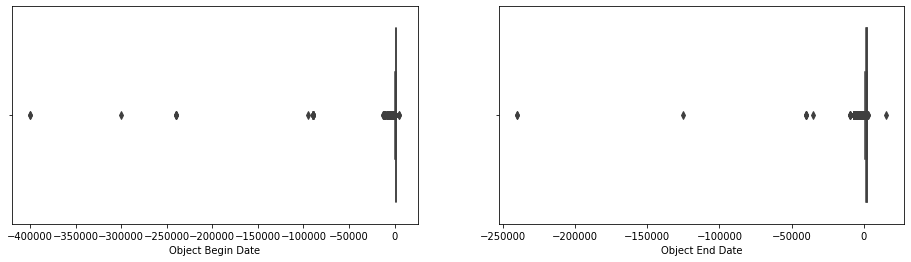

In [28]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
sns.boxplot(x="Object Begin Date", data=df)
plt.subplot(1,2,2)
sns.boxplot(x="Object End Date", data=df)

'First 5 outliers under the accepted range'

363923   -400000
363915   -400000
470122   -300050
363912   -240000
363913   -240000
Name: Object Begin Date, dtype: int64

'Last 5 outliers above the accepted range'

335935    5000
336164    5000
Name: Object Begin Date, dtype: int64

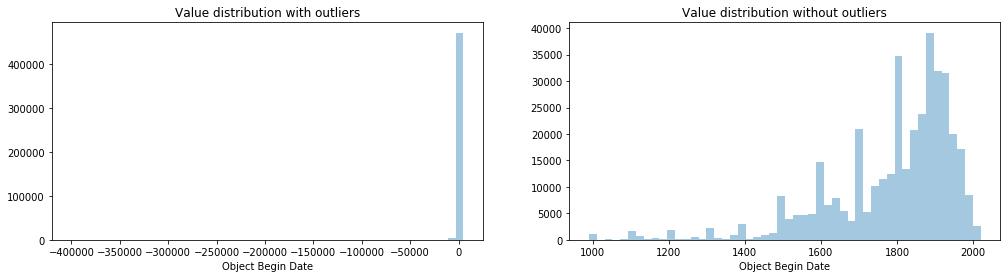

In [29]:
feature = "Object Begin Date"

# display(outliers_filter.sum())

q1, q3, iqr = getOutliersBoundaries(df, feature)

display("First 5 outliers under the accepted range",
    df[df[feature] < q1 - 1.5 * iqr][feature].sort_values().head(5),
    "Last 5 outliers above the accepted range",
    df[df[feature] > q3 + 1.5 * iqr][feature].sort_values().tail(5)
)

seeOutliers(df, feature)

'First 5 outliers under the accepted range'

363915   -240000
363923   -240000
470122   -125000
363912    -40000
363911    -40000
Name: Object End Date, dtype: int64

'Last 5 outliers above the accepted range'

231374     2835
246733     2870
100045    15335
Name: Object End Date, dtype: int64

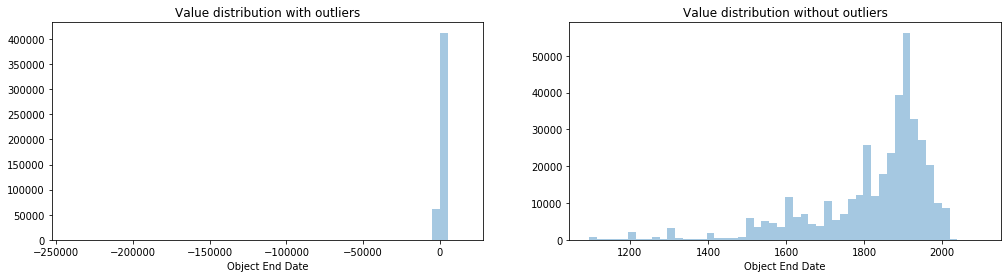

In [30]:
feature = "Object End Date"

# display(outliers_filter.sum())

q1, q3, iqr = getOutliersBoundaries(df, feature)

display("First 5 outliers under the accepted range",
    df[df[feature] < q1 - 1.5 * iqr][feature].sort_values().head(5),
    "Last 5 outliers above the accepted range",
    df[df[feature] > q3 + 1.5 * iqr][feature].sort_values().tail(5)
)

seeOutliers(df, feature)

## 6. Missing data detection and imputation

- I see here the same problem with high cardinality (and dimensionality) as described at outliers section.
- Therefore the imputation method I choosed is rather simple

### Missing values Detection

- Usually it makes more sense to impute values if there is enough data already.
- Look at the data where is missing up to 20% of rows.

In [31]:
row_num = df.shape[0]
full_columns = (df.isna().sum() == 0).values
missing_less_than_20p = (df.isna().sum() < row_num*0.2).values

columns_between_80_100 = df.columns[missing_less_than_20p & ~full_columns]

display("Features with less than 20% missing values:",
    df[columns_between_80_100].isna().sum().sort_values()
)

'Features with less than 20% missing values:'

Credit Line         420
Object Name        1354
AccessionYear      3966
Medium             7113
Object Date       14912
Title             29871
Classification    56063
Dimensions        75475
dtype: int64

### Potential candidates for group imputation

- impute values by median of the same group (in case of categorical values not medial, but mode)

In [32]:
df.apply(lambda x: x.nunique()).sort_values()[:20]

Metadata Date          0
Repository             1
Is Highlight           2
Is Timeline Work       2
Is Public Domain       2
Department            19
State                104
Geography Type       108
River                229
AccessionYear        264
Artist Gender        276
Subregion            352
Reign                378
Excavation           384
Dynasty              386
Gallery Number       590
Region               710
Locale               856
Country              925
County              1085
dtype: int64

### Helper functions

- Department was choosed as a representative group, mainly because its the only possible option, but also the column is fullfilled (luck)

In [33]:
DEP = "Department"

def getFeatureModeByDepartment(df, feature):
    mostCommonFeature = []
    for dep, group in df[[DEP, feature]].groupby(DEP):
        sizes = group.groupby(feature).size()
        mostCommonFeature.append([dep, sizes[sizes == sizes.max()].index.values[0], sizes.max()])
    return pd.DataFrame(mostCommonFeature, columns=[DEP, feature, "Number of objects"])

def getLinesOfFeatureGroupSizesByDepartment(df, feature):
    lines = []
    for dep, g in df.groupby(DEP):
        for index, value in g.groupby(feature).size().items():
            lines.append([dep, value, index])
    return lines

def plotFeatureCountByDepartment(df, feature):
    lines = getLinesOfFeatureGroupSizesByDepartment(df, feature)
    df = pd.DataFrame(lines, columns=["Department", f'"{feature}" feature group size', feature])
    plt.figure(figsize=(8, 10))
    sns.stripplot(x=f'"{feature}" feature group size', y="Department", data=df)\
        .set_title(f'Sizes of feature "{feature}" groups by departments')


### Feature "Medium"

- On the graph is visible the "Drawing and Prints" "Commercial color lithograph" was shifted to the left.
- Also the gap between the two largest groups in "European Sculpture and Decorative Arts" is bigger now, and that is about it.

Number of missing values: 7113

Number of missing values: 0



'The imputed values are visible as differences of the last two columns'

,Department,Medium,Number of objects,New numbers
0,Ancient Near Eastern Art,Ceramic,886,886
1,Arms and Armor,Steel,1617,1799
2,"Arts of Africa, Oceania, and the Americas",Ceramic,921,921
3,Asian Art,Silk,2820,3067
4,Costume Institute,Silk,5620,5623
5,Drawings and Prints,Commercial color lithograph,18342,22614
6,Egyptian Art,Faience,4728,4729
7,European Paintings,Oil on canvas,1190,1190
8,European Sculpture and Decorative Arts,Silk,3471,4794
9,Greek and Roman Art,Terracotta,23034,23049


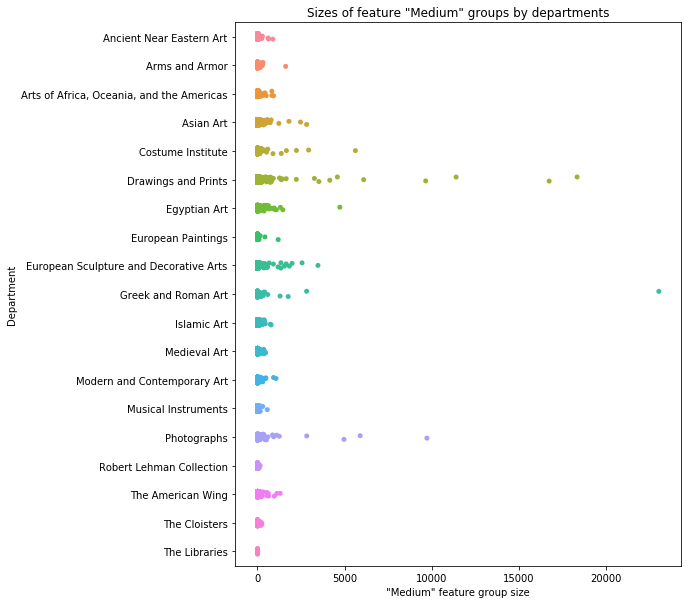

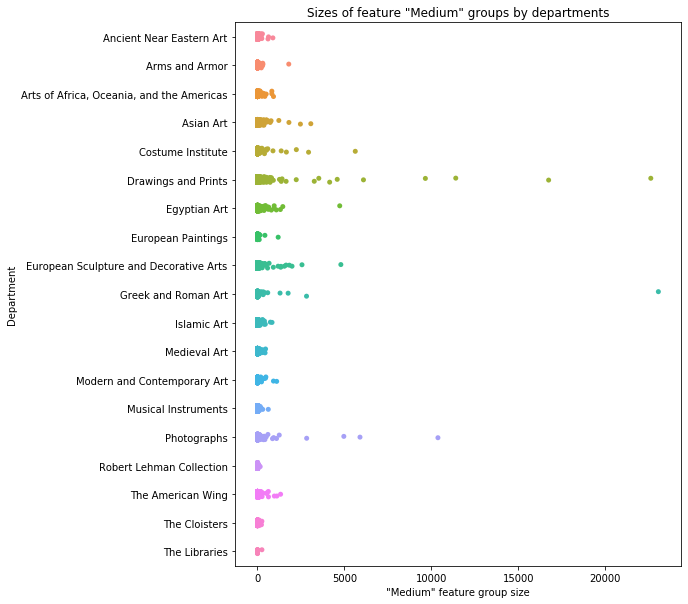

In [34]:
df = original_df.copy()
DEP = "Department"
MED = "Medium"

med_na_filter = df[MED].isna()
print(f"Number of missing values: {med_na_filter.sum()}\n")

df[MED] = df[~med_na_filter][MED].apply(str.capitalize)

plotFeatureCountByDepartment(df, MED)

feature_mode_df = getFeatureModeByDepartment(df, MED)

mediumModes = df.groupby(DEP)[MED].apply(lambda x: x.mode())
df.loc[med_na_filter, MED] = df[med_na_filter][DEP].apply(lambda d: mediumModes[d].values[0])

print(f"Number of missing values: {df[MED].isna().sum()}\n")

feature_mode_df["New numbers"] = getFeatureModeByDepartment(df, MED)["Number of objects"]

display("The imputed values are visible as differences of the last two columns",
    feature_mode_df
)

plotFeatureCountByDepartment(df, MED)

### Feature "AccessionYear"

- In terms of imputation I would do finished the extraction from "Object Number", the rest I would probably dropped.
    - This approach is probably more feature engineering than imputation methods, so strictly in this field I would probably solve it with median.

In [35]:
explore_feature(df, "AccessionYear")

Number of rows: 474526
Number of unique values (nan included): 265



'Sample of how the values look like:'

202985    1992
177505    1952
297687    1889
404353    1927
102276    1909
245574    1923
465952    1933
62619     1920
208979    1970
444994    2011
Name: AccessionYear, dtype: object

Value types: [<class 'float'> <class 'int'> <class 'str'>]

Float values - number of floats: 426015 (~ 89.78% of rows)
nan values: 3966 (~ 0.93% of floats ~ 0.84% of rows)
Decimal numbers: 422049 (~ 99.07% of floats)

<class 'int'> values - number: 16384 (~ 3.45% of rows)

String values - number of string values: 32127 (~ 6.77% of rows)
Numeric strings: 32125 (~ 99.99% of strings)
Other strings: 2 (~ 0.01% of strings)

Number of unique other strings: 2, the strings: ['2005-02-15' '2020-03-23']



### Feature "Classification"

- This feature I would handle the same way as the feature "Medium".

In [36]:
df = original_df.copy()

feature = "Classification"

df[feature] = df[feature].fillna("Unclassified")

explore_feature(df, feature)

df[feature] = df[feature].astype('category')

explore_feature(df, feature)

Number of rows: 474526
Number of unique values (nan included): 1186



'Sample of how the values look like:'

160617        Photographs
116129          Sculpture
272524    Prints|Ephemera
224864              Books
48850              Prints
156415        Photographs
34394             Lacquer
330094           Drawings
290554             Prints
16281            Drawings
Name: Classification, dtype: object

Value types: [<class 'str'>]

String values - number of string values: 474526 (~ 100.00% of rows)
Numeric strings: 0 (~ 0.00% of strings)
Other strings: 474526 (~ 100.00% of strings)

Number of unique other strings: 1186, the strings: ['Metal' 'Silver' 'Glass' ... 'Books|Costumes' 'Books|Photographs'
 'Metalwork-Base Metal|Jewelry']

Number of rows: 474526
Number of unique values (nan included): 1186



'Sample of how the values look like:'

302111              Ceramics
16004               Textiles
42018              Paintings
99034     Ceramics-Porcelain
12148               Drawings
422109       Prints|Ephemera
396667       Prints|Ephemera
81811           Unclassified
333091               Jewelry
464949       Prints|Ephemera
Name: Classification, dtype: category
Categories (1186, object): [(not assigned), Accessory, Accessory-Carried, Accessory-Foot and Leg wear, ..., sealings, tablets and plaques, |, ||]

Value types: [<class 'str'>]

String values - number of string values: 474526 (~ 100.00% of rows)
Numeric strings: 0 (~ 0.00% of strings)
Other strings: 474526 (~ 100.00% of strings)

Number of unique other strings: 1186, the strings: [Metal, Silver, Glass, Furniture, Ceramics, ..., Postcards|Ephemera, Prints|Portfolios|Photographs, Books|Costumes, Books|Photographs, Metalwork-Base Metal|Jewelry]
Length: 1186
Categories (1186, object): [Metal, Silver, Glass, Furniture, ..., Prints|Portfolios|Photographs, Books|Costumes, Books|Photographs, Metalwork-Base Metal|Jewelry]



### Feature "Object Date"

- This feature I would gradually add simple regex until the all the syntexes would be covered, and then handle it separatly
    - (extract groups are good start, but this like b.c. or 1st millenia can make it complicated) 

In [37]:
feature = "Object Date"

# explore_feature(df, feature)

nans = df[feature].apply(lambda x: pd.isna(x))

solved = nans.copy()

patterns = [
    r"(dated\s+)?\d+(–\d+)?\Z", 
    r"\d+s(–\d+s?)?",
    r"\D*\d+(–\d+)?\D*b\.c\.",
    r"ca\.\s*\d+",
    r".*\d{1,2}(st|nd|rd|th)\s+century",
    "n\.d\."
]

for pattern in patterns:
    sol = df[feature].str.match(pattern, case=False) == True
    solved = solved | sol
    
print("Number of already handled: {sol.sum()}\n")

display("Values that are not handled yet:",
    df[~solved][feature].sample(n=20)
)

print("There is {} values that does not match.\n".format(
    df.shape[0] - solved.sum()
))

Number of already handled: {sol.sum()}



'Values that are not handled yet:'

221657                         1862 or later
159772    January 27, 1942, printed ca. 1983
396615                     January–June 1827
437157                6th/5th centuries B.C.
63337                     Datable to 1938–45
259352                              May 1751
183864                   1968, printed later
375867                         February 1809
292482                        published 1661
464696                     December 23, 1809
159282                    1966, printed 1979
368326                         A.D. 800–1150
429116                          May 30, 1786
457919                   1902 or ca. 1912–13
173831                      January 10, 1941
259491                         July 12, 1808
175973                        March 26, 1954
81313                 late 1920s–early 1930s
243836                       January 1, 1798
221226                          October 1922
Name: Object Date, dtype: object

There is 35047 values that does not match.

